In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
def System(r,t,a=0.5,b=0.3):
    
    x,vx,ax = r
    
    dxdt = -a*x
    dvxdt = a*x-b*vx
    daxdt = b*vx
    
    return np.array([dxdt,dvxdt,daxdt])

In [3]:
t = np.linspace(0,10,50)
r0 = np.array([500.,0.,0.])

In [4]:
sol = odeint(System, r0, t)

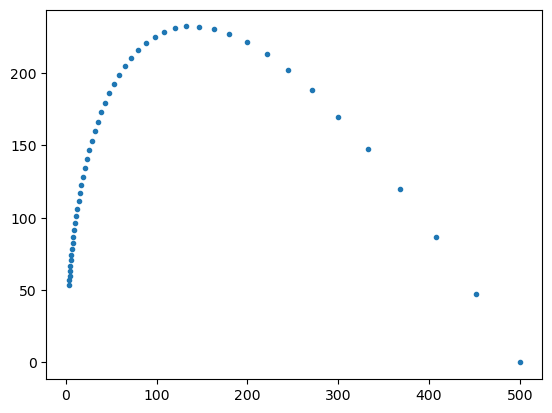

In [5]:
plt.scatter(sol[:,0],sol[:,1],marker='.')

In [6]:
def Increment(f,r,t,h):
    
    state1 = np.array([r[0],r[1],r[2]])
    K1 = f(state1,t)
    
    state2 = np.array([r[0]+0.5*h*K1[0],r[1]+0.5*h*K1[1], r[2]+0.5*h*K1[2]])
    K2 = f(state2,t+0.5*h)
    
    state3 = np.array([r[0]+0.5*h*K2[0],r[1]+0.5*h*K2[1], r[2]+0.5*h*K2[2]])
    K3 = f(state3,t+0.5*h)
    
    state4 = np.array([r[0]+h*K3[0],r[1]+h*K3[1],r[2]+h*K3[2]])
    K4 = f(state4, t+h)
    
    Deltaf = h*(K1+2*K2+2*K3+K4)/6
    
    return r+Deltaf

def Adaptativo(f,x0,t):
    
    h = t[1] - t[0]
    
    tf = t[-1]
    t = t[0]
    
    r = r0
    
    Time = np.array([t])
    Vector = r
    
    Steps = np.array([h])
    
    while t < tf:
        
        Delta1 = Increment(f,r,t,h)
        Delta2 = Increment(f,r,t,0.5*h)
        Delta3 = Increment(f,r,t,2*h)
    
        Deltas = Delta1.copy()
        ht = Delta1.copy()
        
        for i in range(Delta1.shape[0]):
            Deltas[i],ht[i] = CheckStep(Delta1[i],Delta2[i],Delta3[i],h)
    
    
        h = np.mean(ht)
        t += h
        
        r = Increment(f,r,t,h)
        
        
        Steps = np.append(Steps,h )
        Time = np.append(Time,t)
        Vector = np.vstack((Vector,r))
        
    return Time,Vector,Steps

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def System(r, t, a=0.5, b=0.3):
    x, vx, ax = r
    
    dxdt = -a * x
    dvxdt = a * x - b * vx
    daxdt = b * vx
    
    return np.array([dxdt, dvxdt, daxdt])

t = np.linspace(0, 10, 50)
r0 = np.array([500., 0., 0.])

sol = odeint(System, r0, t)

def Increment(f, r, t, h):
    state1 = np.array([r[0], r[1], r[2]])
    K1 = f(state1, t)
    
    state2 = np.array([r[0] + 0.5 * h * K1[0], r[1] + 0.5 * h * K1[1], r[2] + 0.5 * h * K1[2]])
    K2 = f(state2, t + 0.5 * h)
    
    state3 = np.array([r[0] + 0.5 * h * K2[0], r[1] + 0.5 * h * K2[1], r[2] + 0.5 * h * K2[2]])
    K3 = f(state3, t + 0.5 * h)
    
    state4 = np.array([r[0] + h * K3[0], r[1] + h * K3[1], r[2] + h * K3[2]])
    K4 = f(state4, t + h)
    
    Deltaf = h * (K1 + 2 * K2 + 2 * K3 + K4) / 6
    
    return r + Deltaf

def Adaptativo(f, r0, t, e=1e-4):
    h = t[1] - t[0]
    
    tf = t[-1]
    t = t[0]
    
    r = r0
    
    TimeVector = np.array([t])
    Vectors = np.array([r])
    Steps = np.array([h])
    
    while t < tf:
        # Avance h desde el punto actual
        r1 = Increment(f, r, t, h)
        # Avance h desde el siguiente punto
        r2 = Increment(f, r1, t + h, h)
        # Avance 2h desde el punto actual
        rt = Increment(f, r, t, 2 * h)
        # El error es comparar los avances
        # -> h -> h y -> 2h en sus componentes
        error = np.linalg.norm(r2 - rt)
        # Si el error es menor que la tolerancia (e) -> avanzo 2h
        if error < e:
            t += 2 * h
            r = rt
            TimeVector = np.append(TimeVector, t)
            Vectors = np.append(Vectors, [r], axis=0)
        # Si el error es muy grande, cambie el paso
        # Según Fehlberg
        q = 0.85 * (e / error) ** (1 / 4)
        h *= q
        Steps = np.append(Steps, h)
    
    return TimeVector, Vectors

In [8]:
TimeVector, Vectors = Adaptativo(System, r0, t)

In [9]:
len(t1)

NameError: name 't1' is not defined

In [ ]:
plt.scatter(sol[:,0],sol[:,1],marker='.')
plt.scatter(x1[:,0],x1[:,1],marker='.')